## Introduction
This dataset focuses on the diagnosis of tumors, aiming to distinguish between benign and malignant cases. Each observation in the dataset includes several numerical features describing the physical properties of the tumor, such as radius_mean, texture_mean, perimeter_mean, and others. Additionally, the dataset includes a target variable, diagnosis, which indicates whether the tumor is benign (B) or malignant (M).

### Objectives
The primary goal of this analysis is to apply clustering techniques, specifically unsupervised learning algorithms, to identify natural groupings within the data. The focus is on determining whether these clusters can accurately separate benign and malignant tumors, aligning with the diagnostic labels provided.

### Techniques

1. **Data Preprocessing**:
   - Transforming categorical labels (`B` and `M`) into numerical values (`0` for benign and `1` for malignant).
   - Removing irrelevant fields such as `ID` to ensure they don't bias the clustering algorithm.
   
   
2. **Exploratory Data Analysis**:
   - Visualizing the distribution of benign and malignant cases.
   - Analyzing the balance of the dataset and exploring key patterns in the features.
   

3. **Clustering Algorithm**:
   - Applying the **K-Means clustering algorithm** to group the data into clusters.
   - Using metrics like the **Confusion Matrix** to evaluate the alignment between the clusters and actual labels.
   

4. **Visualization**:
   - Plotting results to better understand the separability of the clusters.
   - Visualizing feature contributions to the clustering process.



In [1]:
    
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import warnings
warnings.filterwarnings("ignore")

/Users/paty/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Load the CSV file into a DataFrame
df = pd.read_csv("data.csv")

# Print the shape of the dataset (number of rows and columns)
print(df.shape)

# Configure pandas to display all columns
pd.set_option('display.max_columns', None)

# Display a random sample of 5 rows from the dataset
df.sample(5)


(569, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
370,9012315,M,16.35,23.29,109.00,840.4,0.09742,0.14970,0.181100,0.087730,0.2175,0.06218,0.4312,1.0220,2.972,45.50,0.005635,0.03917,0.060720,0.016560,0.03197,0.004085,19.38,31.03,129.30,1165.0,0.1415,0.4665,0.70870,0.22480,0.4824,0.09614
482,912519,B,13.47,14.06,87.32,546.3,0.10710,0.11550,0.057860,0.052660,0.1779,0.06639,0.1588,0.5733,1.102,12.84,0.004450,0.01452,0.013340,0.008791,0.01698,0.002787,14.83,18.32,94.94,660.2,0.1393,0.2499,0.18480,0.13350,0.3227,0.09326
185,874158,B,10.08,15.11,63.76,317.5,0.09267,0.04695,0.001597,0.002404,0.1703,0.06048,0.4245,1.2680,2.680,26.43,0.014390,0.01200,0.001597,0.002404,0.02538,0.003470,11.87,21.18,75.39,437.0,0.1521,0.1019,0.00692,0.01042,0.2933,0.07697
488,913512,B,11.68,16.17,75.49,420.5,0.11280,0.09263,0.042790,0.031320,0.1853,0.06401,0.3713,1.1540,2.554,27.57,0.008998,0.01292,0.018510,0.011670,0.02152,0.003213,13.32,21.59,86.57,549.8,0.1526,0.1477,0.14900,0.09815,0.2804,0.08024
486,913102,B,14.64,16.85,94.21,666.0,0.08641,0.06698,0.051920,0.027910,0.1409,0.05355,0.2204,1.0060,1.471,19.98,0.003535,0.01393,0.018000,0.006144,0.01254,0.001219,16.46,25.44,106.00,831.0,0.1142,0.2070,0.24370,0.07828,0.2455,0.06596


Next, we will plot the data to evaluate the number of benign and malignant tumors. The goal of this analysis is to determine whether applying a **clustering algorithm** can help identify two or more groups that correspond to benign and malignant tumors based on their cluster assignments.


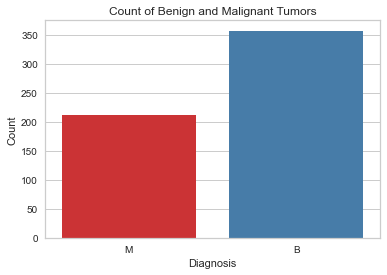

Number of Benign (B):  357
Number of Malignant (M):  212


In [4]:
# Create a count plot for the "diagnosis" variable
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='diagnosis', data=df, palette='Set1')
ax.set(xlabel='Diagnosis', ylabel='Count', title='Count of Benign and Malignant Tumors')
plt.show()

# Retrieve and display the number of benign (B) and malignant (M) cases
B, M = df['diagnosis'].value_counts()
print('Number of Benign (B): ', B)
print('Number of Malignant (M): ', M)


As observed, the majority of the samples are benign tumors (357 cases), while 212 cases are malignant, indicating that this is a balanced dataset.

We replace the target values `B` (benign) and `M` (malignant) with `0` and `1` respectively. This will allow us to create a Confusion Matrix later to evaluate the results in a straightforward manner. Next, we remove the two `ID` columns as they are not relevant to the algorithm, along with the `diagnosis` column, which is the target variable used for comparison. The main focus of this analysis is to verify if the detected clusters can effectively separate the two types of tumors.


In [6]:
# Convert the "diagnosis" labels to numerical values (0 for benign, 1 for malignant) 
# to prepare for a Confusion Matrix later
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

# Remove the "diagnosis" and "id" columns from the feature set, 
# leaving only the variables without any target information to prevent pre-identification of tumor types
X = df.drop(['diagnosis', 'id'], axis=1)

# Display a random sample of 5 rows from the feature set
X.sample(5)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
444,18.03,16.85,117.50,990.0,0.08947,0.12320,0.10900,0.06254,0.1720,0.05780,0.2986,0.5906,1.921,35.77,0.004117,0.01560,0.029750,0.009753,0.01295,0.002436,20.38,22.02,133.30,1292.0,0.12630,0.26660,0.42900,0.15350,0.2842,0.08225
217,10.20,17.48,65.05,321.2,0.08054,0.05907,0.05774,0.01071,0.1964,0.06315,0.3567,1.9220,2.747,22.79,0.004680,0.03120,0.057740,0.010710,0.02560,0.004613,11.48,24.47,75.40,403.7,0.09527,0.13970,0.19250,0.03571,0.2868,0.07809
471,12.04,28.14,76.85,449.9,0.08752,0.06000,0.02367,0.02377,0.1854,0.05698,0.6061,2.6430,4.099,44.96,0.007517,0.01555,0.014650,0.011830,0.02047,0.003883,13.60,33.33,87.24,567.6,0.10410,0.09726,0.05524,0.05547,0.2404,0.06639
51,13.64,16.34,87.21,571.8,0.07685,0.06059,0.01857,0.01723,0.1353,0.05953,0.1872,0.9234,1.449,14.55,0.004477,0.01177,0.010790,0.007956,0.01325,0.002551,14.67,23.19,96.08,656.7,0.10890,0.15820,0.10500,0.08586,0.2346,0.08025
169,14.97,16.95,96.22,685.9,0.09855,0.07885,0.02602,0.03781,0.1780,0.05650,0.2713,1.2170,1.893,24.28,0.005080,0.01370,0.007276,0.009073,0.01350,0.001706,16.11,23.00,104.60,793.7,0.12160,0.16370,0.06648,0.08485,0.2404,0.06428


We standardize the features to ensure they are all expressed on the same scale, which is necessary for applying K-Means clustering later.


In [7]:
# Standardize the features for K-Means
# Scale the feature set X and create a new array called X_scaled
scaler = StandardScaler()

# Apply the scaler and assign the transformed data to X_scaled
X_scaled = scaler.fit_transform(X)

# Display the first two rows of the scaled data
print(X_scaled[:2])


[[ 1.09706398e+00 -2.07333501e+00  1.26993369e+00  9.84374905e-01
   1.56846633e+00  3.28351467e+00  2.65287398e+00  2.53247522e+00
   2.21751501e+00  2.25574689e+00  2.48973393e+00 -5.65265059e-01
   2.83303087e+00  2.48757756e+00 -2.14001647e-01  1.31686157e+00
   7.24026158e-01  6.60819941e-01  1.14875667e+00  9.07083081e-01
   1.88668963e+00 -1.35929347e+00  2.30360062e+00  2.00123749e+00
   1.30768627e+00  2.61666502e+00  2.10952635e+00  2.29607613e+00
   2.75062224e+00  1.93701461e+00]
 [ 1.82982061e+00 -3.53632408e-01  1.68595471e+00  1.90870825e+00
  -8.26962447e-01 -4.87071673e-01 -2.38458552e-02  5.48144156e-01
   1.39236330e-03 -8.68652457e-01  4.99254601e-01 -8.76243603e-01
   2.63326966e-01  7.42401948e-01 -6.05350847e-01 -6.92926270e-01
  -4.40780058e-01  2.60162067e-01 -8.05450380e-01 -9.94437403e-02
   1.80592744e+00 -3.69203222e-01  1.53512599e+00  1.89048899e+00
  -3.75611957e-01 -4.30444219e-01 -1.46748968e-01  1.08708430e+00
  -2.43889668e-01  2.81189987e-01]]


Next, we will perform several iterations with the K-Means algorithm to visualize, using the elbow method, the optimal value of K for this dataset.


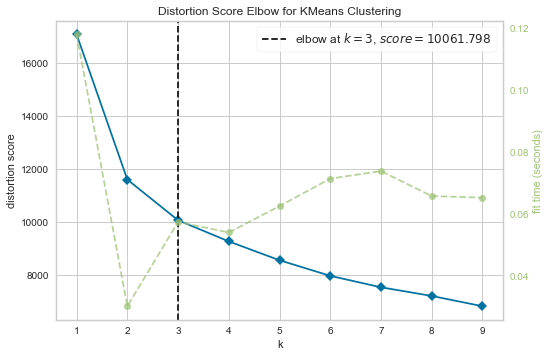

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
# Instantiate the clustering model and visualizer
seed = 0

km = KMeans(init = 'k-means++'
            , max_iter=500
            , n_init=10
            , random_state=seed)


visualizer = KElbowVisualizer(km, k=(1,10))
 
visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show()               # Finalize and render the figure



We applied the Elbow method, which recommended using a value of k=3. However, visually, the elbow is more distinct at k=2. Additionally, since we already know there are two types of tumors (benign and malignant), we will proceed with k=2 and evaluate whether the groups identified by the algorithm align with the two tumor types.

Next, we will apply the silhouette method to further assess which value of k is more appropriate. Ideally, we expect it to confirm k=2.


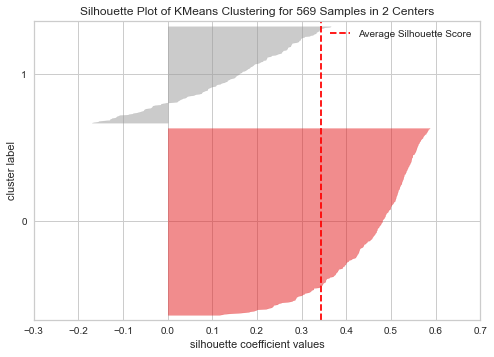

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 569 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [11]:

nclusters = 2
seed = 0

model = KMeans(n_clusters=nclusters
            , init = 'k-means++'
            , max_iter=500
            , n_init=10
            , random_state=seed)


visualizer = SilhouetteVisualizer(model)

visualizer.fit(X_scaled)    # Fit the data to the visualizer
visualizer.show()    # Draw/show/show the data

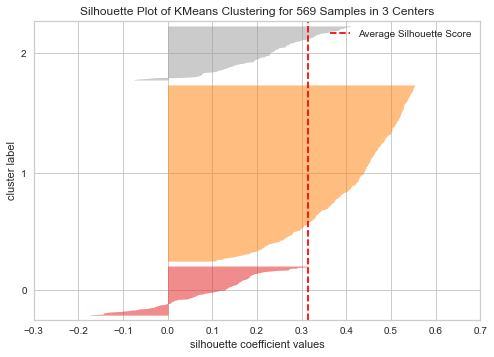

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 569 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [12]:
nclusters = 3
seed = 0

model = KMeans(n_clusters=nclusters
            , init = 'k-means++'
            , max_iter=500
            , n_init=10
            , random_state=seed)


visualizer = SilhouetteVisualizer(model)

visualizer.fit(X_scaled)    # Fit the data to the visualizer
visualizer.show()    # Draw/show/show the data

After applying the Silhouette method, we confirmed that 2 clusters are appropriate, aligning with the visual analysis from the Elbow method.

Next, we will apply K-Means clustering, followed by a simple transformation. Since K-Means assigns cluster labels arbitrarily, we need to enforce a rule where the **majority cluster** (the one with the largest number of elements) is assigned a value of 0, and the **minority cluster** is assigned a value of 1. This approach aligns with the target variable, as we determined earlier that the minority group corresponds to malignant tumors. By doing so, when we later use the confusion matrix, it will correctly identify matches when both values are 1 or 0.


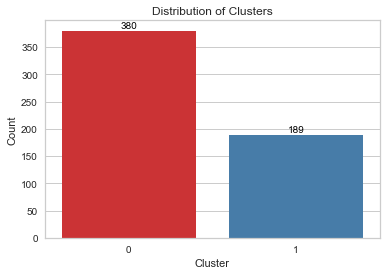

In [8]:
# Create the K-Means model with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit and predict clusters on the scaled data, and assign the resulting clusters to df['cluster']
df['cluster'] = kmeans.fit_predict(X_scaled)

# Get the size of each cluster
cluster_sizes = df['cluster'].value_counts()

# Determine the majority cluster
majority_cluster = cluster_sizes.idxmax()

# Reassign cluster labels: 0 for the majority cluster, 1 for the minority cluster
df['cluster'] = df['cluster'].apply(lambda x: 0 if x == majority_cluster else 1)

# Create a bar chart for the cluster distribution
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='cluster', data=df, palette='Set1')

# Add labels showing the count on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Distribution of Clusters')
plt.show()


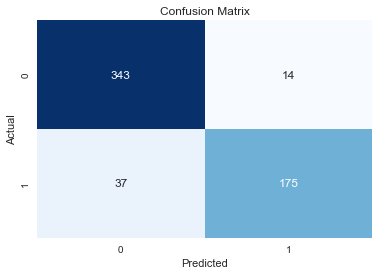

In [9]:
# Create a confusion matrix to compare the cluster assignments with the "diagnosis" field
conf_matrix = confusion_matrix(df['diagnosis'], df['cluster'])

# Display the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


The Confusion Matrix shows VERY GOOD results, with the majority of cases correctly classified. This indicates that each tumor type has highly distinctive characteristics, making them easily identifiable and belonging to a specific cluster.

Next, we will apply PCA to reduce the dimensionality of the data and visualize the points in a 2D plot, coloring each cluster with a different color.


In [10]:
# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Apply PCA to the scaled data and store the result in X_pca
X_pca = pca.fit_transform(X_scaled)

# Print the explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each principal component:", explained_variance)


Explained variance by each principal component: [0.44272026 0.18971182]


it can be observed that the variance captured by the first two principal components is 63%, which is relatively low. This indicates that these components do not fully represent the original data. Nevertheless, we will proceed to visualize the points. As an added suggestion, a 3D plot could be used to capture more variance and provide a more reliable visualization of the data points.


In [11]:
# Create a DataFrame with the new PCA variables
df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])


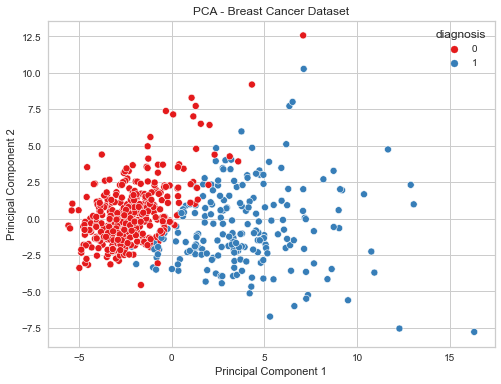

In [12]:
# Add the "diagnosis" column to the PCA DataFrame
df_pca['diagnosis'] = df['diagnosis']

# Visualize the result with a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='diagnosis', data=df_pca, palette='Set1')
plt.title('PCA - Breast Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Despite the low degree of explained variance, two clusters can be observed, separated by an imaginary line. However, no clear gap is detected to distinguish them definitively.


In [13]:
# Select the new PCA features for clustering
X_pca_for_clustering = df_pca[['PCA1', 'PCA2']]

In [14]:
# Create the K-Means model with 2 clusters
kmeans_pca = KMeans(n_clusters=2, random_state=42)

# Fit and predict clusters using X_pca_for_clustering, assigning the clusters to df_pca['cluster_pca']
df_pca['cluster_pca'] = kmeans_pca.fit_predict(X_pca_for_clustering)

# Get the size of each cluster
cluster_sizes = df_pca['cluster_pca'].value_counts()

# Determine the majority cluster
majority_cluster = cluster_sizes.idxmax()

# Reassign cluster labels: 0 for the majority cluster, 1 for the minority cluster
df_pca['cluster_pca'] = df_pca['cluster_pca'].apply(lambda x: 0 if x == majority_cluster else 1)

# Display the resulting cluster sizes
print(df_pca['cluster_pca'].value_counts())


0    378
1    191
Name: cluster_pca, dtype: int64


We applied clustering again, but this time, instead of working with the entire scaled dataset, we directly used the two principal components identified. the goal is to validate whether we achieve better results and reduced execution time. this will help verify the claimed advantages of PCA when training algorithms. as an additional step, you could measure the training time for both approaches: training a k-means model with two principal components versus using the original variables, which are much more numerous.


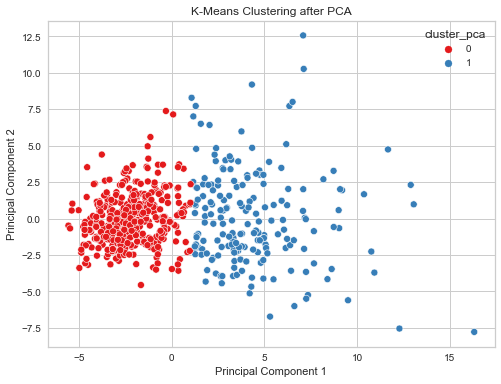

In [15]:
# Visualize the K-Means clustering result on a scatter plot with PCA clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster_pca', data=df_pca, palette='Set1', legend='full')
plt.title('K-Means Clustering after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [16]:
df_pca.sample(20)

,PCA1,PCA2,diagnosis,cluster_pca
18,4.948704,-4.114334,1,1
505,1.076693,8.294775,0,1
475,-1.998185,-0.206371,0,0
192,-5.565736,-0.477848,0,0
136,-2.600790,-0.482335,0,0
260,3.378251,-3.371228,1,1
502,-1.408771,1.505771,0,0
417,6.003617,-0.091029,1,1
97,-3.904338,1.190067,0,0
20,-1.578161,0.572808,0,0


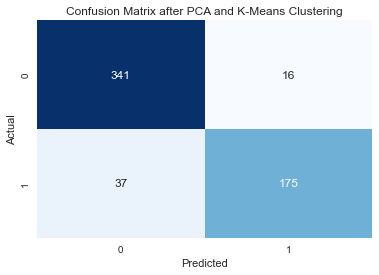

In [17]:
# Create a confusion matrix to compare the clusters with the "diagnosis" field
conf_matrix_pca = confusion_matrix(df_pca['diagnosis'], df_pca['cluster_pca'])

# Display the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_pca, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix after PCA and K-Means Clustering')
plt.show()


When analyzing the accuracy with PCA, we achieved a minimal improvement, practically the same result as before. In this case, we did not observe a significant improvement in the outcome. However, if we were dealing with a much larger dataset, it would likely be more efficient to train the model with the new variables, as the algorithm achieves almost identical results. On the other hand, using 3 components might lead to better results, given that we confirmed the 2 principal components do not reliably represent the original features.


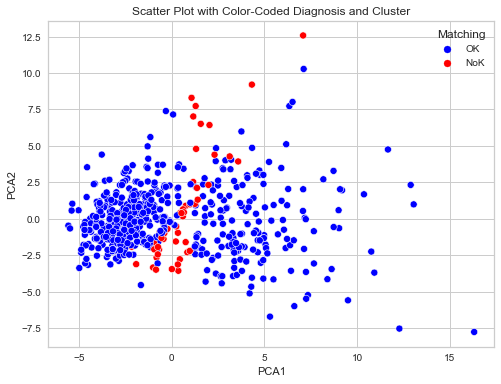

In [18]:
# Create a scatter plot
plt.figure(figsize=(8, 6))

# Assign colors based on whether the diagnosis matches the cluster prediction
colors = df_pca.apply(lambda row: 'OK' if row['diagnosis'] == row['cluster_pca'] else 'NoK', axis=1)

# Plot the scatter plot with color-coded points
sns.scatterplot(x='PCA1', y='PCA2', data=df_pca, hue=colors, palette=['blue', 'red'], s=50)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Scatter Plot with Color-Coded Diagnosis and Cluster')
plt.legend(title='Matching')
plt.show()


in this plot, we marked the misclassified cases in red. This outcome is expected, as these cases are located near the division between the two clusters, making them more likely to be misclassified. An important next step could be to evaluate another dimensionality reduction method that separates the points more distinctly or to test a different clustering algorithm to determine if better results can be achieved. Additionally, using more principal components could be considered, as the representativeness of just two components is low. This plot compares the original target with the identified cluster.

Nevertheless, I believe the claustering algorithm achieved an excellent result, correctly classifying the majority of cases. Out of 569 cases, 516 were classified correctly, resulting in an accuracy of 90.6%.

The most interesting aspect of this is that the problem was solved using a claustering algorithm, which would be highly useful in the case of unlabeled data. Here, we only used the labels to allow a comparison between the obtained results and the actual classification.


In [19]:
# Apply t-SNE to reduce dimensionality to 2 components, aiming to improve training and visualize clusters

from sklearn.manifold import TSNE

# Initialize t-SNE with 2 components
tsne = TSNE(n_components=2, random_state=42)

# Apply t-SNE to the scaled data and store the result in X_tsne
X_tsne = tsne.fit_transform(X_scaled)


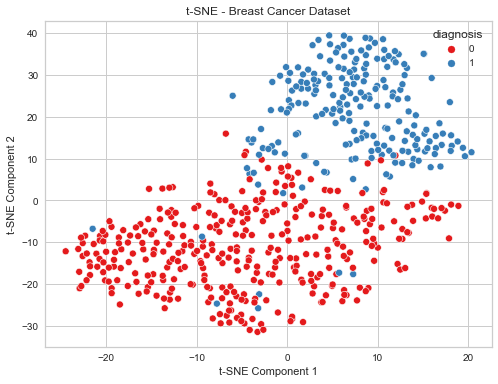

In [20]:
# Create a DataFrame with the new t-SNE variables
df_tsne = pd.DataFrame(data=X_tsne, columns=['t-SNE1', 't-SNE2'])

# Add the "diagnosis" column to the t-SNE DataFrame
df_tsne['diagnosis'] = df['diagnosis']

# Visualize the result with a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='t-SNE1', y='t-SNE2', hue='diagnosis', data=df_tsne, palette='Set1')
plt.title('t-SNE - Breast Cancer Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


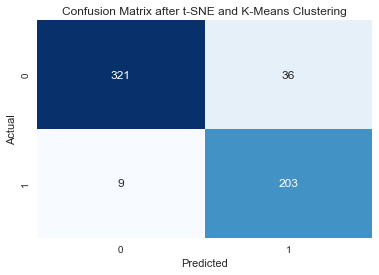

In [21]:
# Select the new t-SNE features for clustering
X_tsne_for_clustering = df_tsne[['t-SNE1', 't-SNE2']]

# Create the K-Means model with 2 clusters
kmeans_tsne = KMeans(n_clusters=2, random_state=42)
df_tsne['cluster_tsne'] = kmeans_tsne.fit_predict(X_tsne_for_clustering)

# Get the size of each cluster
cluster_sizes_tsne = df_tsne['cluster_tsne'].value_counts()

# Determine the majority cluster
majority_cluster_tsne = cluster_sizes_tsne.idxmax()

# Reassign cluster labels: 0 for the majority cluster, 1 for the minority cluster
df_tsne['cluster_tsne'] = df_tsne['cluster_tsne'].apply(lambda x: 0 if x == majority_cluster_tsne else 1)

# Create a confusion matrix to compare the clusters with the "diagnosis" field
conf_matrix_tsne = confusion_matrix(df_tsne['diagnosis'], df_tsne['cluster_tsne'])

# Display the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_tsne, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix after t-SNE and K-Means Clustering')
plt.show()


### Conclusions of the Analysis and Development:
The analysis and application of clustering techniques to tumor data have demonstrated that it is possible to distinguish between benign and malignant tumors with a high degree of accuracy, even without explicit labels. Below are the main findings and conclusions:

* **Confirmation of the Number of Clusters**:
Using the Silhouette method and the visual analysis of the Elbow Method, it was confirmed that two clusters are the optimal configuration for grouping these data, aligning with the categories of benign and malignant tumors.
The adaptation of the clusters to assign a value of 0 to the majority cluster and 1 to the minority cluster facilitates the comparison with the original diagnosis value, enabling the evaluation of accuracy through a confusion matrix.

* **Confusion Matrix Results**:
The confusion matrix reveals high accuracy, with most cases correctly classified. This suggests that the characteristics of each tumor type (benign or malignant) are distinctive enough to group into specific clusters, which is remarkable given that no labels were used for training.
This high accuracy (90.6%) demonstrates that the clustering model can be a valuable solution for tumor classification in cases where labeled data is unavailable.

* **Dimensionality Reduction with PCA**:
The application of PCA to reduce dimensionality to two principal components allowed clusters to be visualized in 2D. However, it captured only 63% of the original variance, which is relatively low. While it facilitates cluster visualization, its ability to faithfully represent all features is limited.
The separation of the clusters in the plot is visible but does not present a clear boundary. This indicates that, while the clusters are defined, there is no rigid division between the groups.
Clustering directly on PCA-reduced data showed minimal improvement in performance but could be beneficial in terms of execution time for larger datasets.

* **Potential for Improvement**:
Considering that the separation with two principal components is not entirely clear, one option would be to test with three components to see if the explained variance increases and if this impacts model accuracy.
Another possible improvement would be to explore additional dimensionality reduction techniques, such as t-SNE, to achieve more distinct cluster visualization.
Additionally, testing other clustering algorithms like DBSCAN or Hierarchical Clustering could confirm if better results can be achieved.

* **Applicability in Unlabeled Contexts**:
The most remarkable aspect of this analysis is that clustering, an unsupervised technique, successfully classified the majority of tumors. This is especially useful in scenarios where labeled data is unavailable, such as in initial diagnoses without prior evaluation.
Labels were used here solely for validation purposes, but the fact that clustering works without supervision suggests that this methodology could be applied to other problems where labeled data is not available.

### Final Conclusion:
The use of K-Means in this analysis was effective, achieving high accuracy and demonstrating that tumor characteristics are sufficiently differentiated to form consistent groups. Despite the limitations of dimensionality reduction with PCA, the results are promising and reinforce the idea that clustering algorithms can be valuable tools for preliminary classifications in unlabeled datasets. This analysis also highlights the potential for further exploration to improve accuracy through parameter tuning, the addition of components, and testing alternative algorithms.
